# Introdução

Olá, bem vindo ao Exemplo 2 de Machine Learning! Neste modulo vamos lidar com um dataset de nome Soybean, que trata de doenças na plantação de soja, queremos fazer previsões da coluna `class`. É um dataset bem extenso, com mais de 30 atributos (colunas), porém não se assuste. Ele vai ser ainda mais fácil de criar um modelo, pois não precisa de muitos tratamentos.

# Analisando os dados

Importando bibliotecas

In [259]:
import pandas as pd

Lendo Dataset

In [260]:
dataset = pd.read_csv('soybean.csv')

## Visualizando Dataset

Como podemos ver o dataset é muito grande, então você se pergunta: Vamos precisar analisar coluna por coluna? Sim e não. Durtante o trabalho um Cientísta de Dados, muitas vezes, tem que lidar com dados gigantescos e quase sempre apresentam erros, mas existem técnicas para facilitar esse processo.

Acompanhe:

In [261]:
dataset.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


## Vamos fazer algumas visualizações gráficas para entender os dados:

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

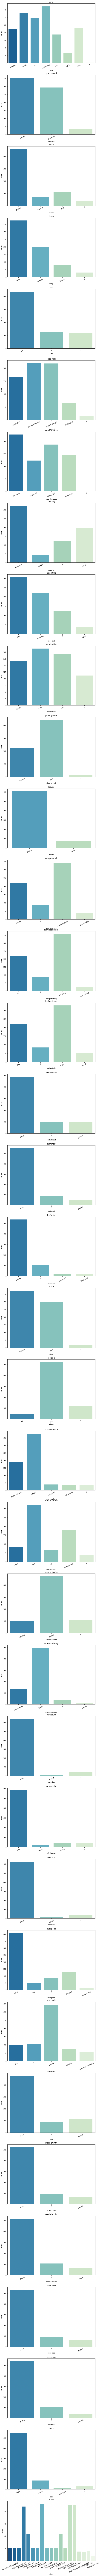

In [263]:
plt.figure(figsize=(10,300))

i = 1
for col in dataset.columns:
    plt.subplot(36, 1, i)
    plt.title(col)
    plt.xticks(rotation= 25)

    sns.countplot(dataset[col], palette= 'GnBu_r')
    i += 1
    

In [264]:
dataset.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


## Info

Usando o método `info()` podemos ver todas as colunas, e se há algum valor NaN (faltando), se dermos uma olhada todos os atributos apresentam `683` valores `non-null` do tipo object (categórico). 

Por sorte nenhuma coluna tem valores NaN então o único tratamento que devemos fazer é passar os valores categóricos para numéricos.

In [265]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             683 non-null    object
 1   plant-stand      683 non-null    object
 2   precip           683 non-null    object
 3   temp             683 non-null    object
 4   hail             683 non-null    object
 5   crop-hist        683 non-null    object
 6   area-damaged     683 non-null    object
 7   severity         683 non-null    object
 8   seed-tmt         683 non-null    object
 9   germination      683 non-null    object
 10  plant-growth     683 non-null    object
 11  leaves           683 non-null    object
 12  leafspots-halo   683 non-null    object
 13  leafspots-marg   683 non-null    object
 14  leafspot-size    683 non-null    object
 15  leaf-shread      683 non-null    object
 16  leaf-malf        683 non-null    object
 17  leaf-mild        683 non-null    ob

# Tratando os Dados

Agora vamos passar os valores categóricos para numéricos, no `Exemplo1` nós utilizamos a função `map` para isso, mas seria inviável fazer isso nesse dataset dada a quantidade de colunas. Então será apresentado o método `LabelEncoder()` que faz esse processo de forma automática.

Importando LabelEncoder()

In [266]:
from sklearn.preprocessing import LabelEncoder

Faremos um loop que vai percorrer todas as colunas do dataser e usar a função `LabelEncoder().fit_transform()` para transformar os valores categóricos em numéricos.

In [267]:
#percorrendo as colunas de dataset
for i in range(len(dataset.columns)):
    dataset.iloc[:,i] = LabelEncoder().fit_transform(dataset.iloc[:,i])

Agora vamos olhar novamente os dados para ver o resultado:

In [268]:
dataset.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,6,2,1,3,2,4,1,2,2,1,...,1,4,4,2,1,1,2,1,2,10
1,2,2,1,3,2,3,2,3,1,0,...,1,4,4,2,1,1,2,1,2,10
2,3,2,1,3,2,4,2,3,1,3,...,1,4,4,2,1,1,2,1,2,10
3,3,2,1,3,2,4,2,3,2,0,...,1,4,4,2,1,1,2,1,2,10
4,6,2,1,3,2,3,2,2,2,3,...,1,4,4,2,1,1,2,1,2,10


Visualizando relação entre os dados

<AxesSubplot:>

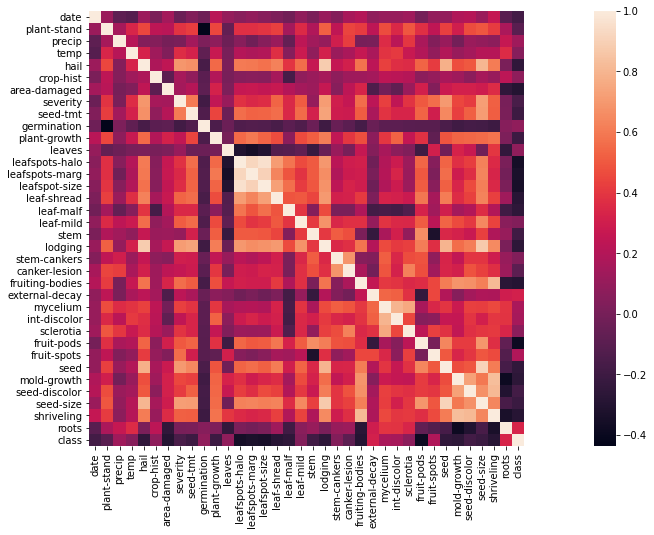

In [269]:
corrn = dataset.corr()

#visualizando relação entre os dados
plt.figure(figsize= (25,8))
sns.heatmap(corrn, vmax= 1, square= True)

# Treinamento

Com os valores transformados para numéricos, podemos fazer a separação de treino e teste e criar nosso modelo.

Separando previsores da classe

In [270]:
X = dataset.iloc[:,:35].values
y = dataset.iloc[:,35].values


Importando função train_test_split para separar treino e teste

In [271]:
from sklearn.model_selection import train_test_split

Para separar as listas de treino e teste, faremos como no `Exemplo1`, que criamos uma lista com vários conjuntos de treinos e testes, para diminuir o impácto dos valores randômicos nos resultados.

In [272]:
X_treino_lista, X_teste_lista, y_treino_lista, y_teste_lista = [], [], [], []

rep = 20

for i in range(rep):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state= i)

    X_treino_lista.append(X_treino)
    X_teste_lista.append(X_teste)
    y_treino_lista.append(y_treino)
    y_teste_lista.append(y_teste)

## Classificando

Agora que temos conjuntos de treino e teste, assim como no Exemplo passado faremos uma avaliação de precisão com alguns classificadores principais.

Importando classificadores

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

classificadores = [
    RandomForestClassifier(100),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3)
]

Faremos um teste de precisão com cada classificador para saber qual se sai melhor com esse dataset:

In [257]:
#Importando biblioteca de teste de acuracia
from sklearn.metrics import accuracy_score
import numpy as np

precisoes_media = []
nome_classificadores = []

for clf in classificadores:
    precisoes = []
    nome_classificadores.append(clf.__class__.__name__)
    for i in range(rep):
        #treinando
        clf.fit(X_treino_lista[i], y_treino_lista[i])
        #previsão
        p = clf.predict(X_teste_lista[i])
        #adicionando a precisoes, teste de acurácia
        precisoes.append(accuracy_score(p, y_teste_lista[i]))
    # adicionando media das preciões 
    precisoes_media.append(np.mean(precisoes))

precisoes_media

[0.935672514619883, 0.9195906432748538, 0.8461988304093566, 0.8026315789473684]

Podemos ver que o melhor modelo criado foi o RandomForestClassifier com `0.9368421052631579` ou 93% de precisão.

<BarContainer object of 4 artists>

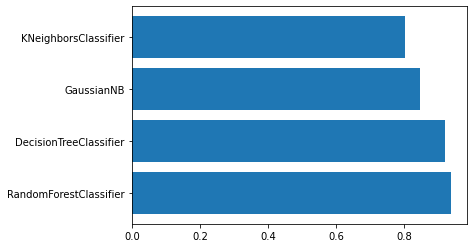

In [258]:
#importando biblioteca de vizualização de gráficos
import matplotlib.pyplot as plt

plt.barh(nome_classificadores, precisoes_media)